#Árboles de decision una intro  ⛴

# 🐣 Carga de librerias

In [ ]:
# 1. Instalación de librerías necesarias
!pip install kaggle
!pip install autoviz
!pip install opendatasets

# 2. Importación de librerías
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
from google.colab import drive
import os
import opendatasets as od # Import the opendatasets library and assign it to the alias 'od'

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

# 3 drive mount
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Mounted at /content/drive


## Cargar datos (de Kaggle)




In [ ]:
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset/data")
dataset_path = "/content/titanic-dataset"
print("Archivos descargados:")
print(os.listdir(dataset_path))

# Construye la ruta completa al archivo CSV
csv_file_path = os.path.join(dataset_path, "Titanic-Dataset.csv") #10710462
print(csv_file_path)

# Carga el archivo CSV usando la ruta correcta
try:
    titanic= pd.read_csv(csv_file_path)
    print("Muy bien: tus emociones y tu dataset han sido validados :)")
except FileNotFoundError:
    print(f"No se encontró el archivo CSV en la ruta: {csv_file_path}")
    print("Asegúrate de que el archivo 'Titanic-Dataset.csv' existe dentro de la carpeta '/content/titanic-dataset'.")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hburkli
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
Archivos descargados:
['Titanic-Dataset.csv']
/content/titanic-dataset/Titanic-Dataset.csv
Muy bien: tus emociones y tu dataset han sido validados :)


## Primeras vistas de los datos

In [ ]:
# Mostrar las primeras 5 filas del dataset
print("▶️ Primeras 5 filas del dataset:")
print(titanic.head())

▶️ Primeras 5 filas del dataset:
   PassengerId  Survived  Pclass  \
0       1           0        3     
1       2           1        1     
2       3           1        3     
3       4           1        1     
4       5           0        3     

                          Name                           Sex     Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0    1     
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0    1     
2                               Heikkinen, Miss. Laina  female  26.0    0     
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1     
4                             Allen, Mr. William Henry    male  35.0    0     

   Parch       Ticket        Fare   Cabin Embarked  
0    0           A/5 21171   7.2500   NaN     S     
1    0            PC 17599  71.2833   C85     C     
2    0    STON/O2. 3101282   7.9250   NaN     S     
3    0              113803  53.1000  C123     S     
4    0    

In [ ]:
# Información general sobre el DataFrame
print("\n📋 Información general del DataFrame:")
print(titanic.info())


📋 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Estadísticas descriptivas de las columnas numéricas
print("\n📊 Estadísticas descriptivas de las variables numéricas:")
print(titanic.describe())


📊 Estadísticas descriptivas de las variables numéricas:
       PassengerId   Survived     Pclass        Age        SibSp    \
count  891.000000   891.000000  891.000000  714.000000  891.000000   
mean   446.000000     0.383838    2.308642   29.699118    0.523008   
std    257.353842     0.486592    0.836071   14.526497    1.102743   
min      1.000000     0.000000    1.000000    0.420000    0.000000   
25%    223.500000     0.000000    2.000000   20.125000    0.000000   
50%    446.000000     0.000000    3.000000   28.000000    0.000000   
75%    668.500000     1.000000    3.000000   38.000000    1.000000   
max    891.000000     1.000000    3.000000   80.000000    8.000000   

          Parch       Fare     
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Resumen de las columnas categóricas:
print("\n🔤 Estadísticas descriptivas de las variables categóricas:")
print(titanic.describe(include='object'))


🔤 Estadísticas descriptivas de las variables categóricas:
               Name          Sex   Ticket Cabin Embarked
count                   891   891     891   204    889  
unique                  891     2     681   147      3  
top     Dooley, Mr. Patrick  male  347082    G6      S  
freq                      1   577       7     4    644  


## Estrategia de analisis de datos

# 🤖 Ideas introductorias de Machine Learning

El Machine Learning es una forma en que las computadoras aprenden a partir de ejemplos para identificar patrones y realizar predicciones o tomar decisiones sin ser programadas explícitamente para cada tarea. n lugar de seguir reglas específicas predefinidas, los modelos de Machine Learning utilizan datos históricos para identificar patrones, mejorar con el tiempo y hacer predicciones basadas en nuevos datos.

**Aprendizaje no supervisado** es un enfoque en el que el modelo se entrena utilizando datos no etiquetados, es decir, no hay una variable objetivo que queramos predecir. En lugar de decirle al modelo qué resultado esperar, lo dejamos que explore los datos por sí mismo y descubra patrones ocultos.

>Por ejemplo, si usáramos un conjunto de datos de pasajeros del Titanic sin saber quién sobrevivió, el modelo podría agrupar automáticamente a los pasajeros según características como edad, clase o género, encontrando estructuras como "grupos de pasajeros similares".

**Aprendizaje supervisado** es un enfoque en el que el modelo se entrena utilizando datos etiquetados. En el caso del dataset Titanic, tenemos una variable objetivo `(Survived)` que queremos predecir basándonos en otras características como la clase `(Pclass)`, la edad `(Age)`, el sexo `(Sex)`, entre otras.

**Clasificación:** el tipo específico de aprendizaje supervisado que se utiliza aquí es clasificación. Esto significa que estamos intentando predecir una etiqueta categórica: 0 *(No sobrevivió)* o 1 *(Sobrevivió)*.

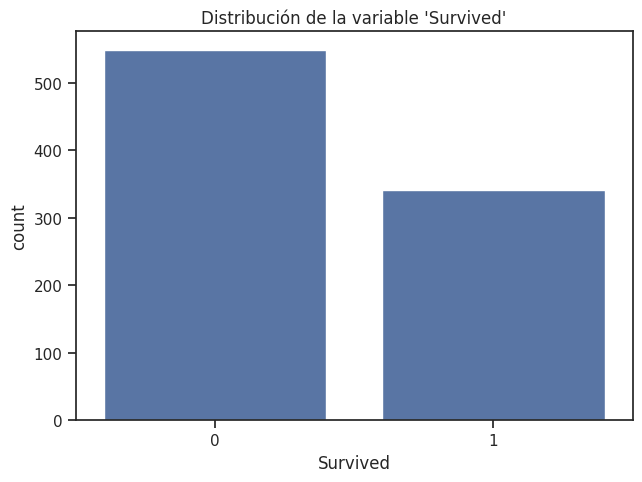

In [ ]:
# Exploración de la variable objetivo 'Survived'
sns.countplot(x='Survived', data=titanic)
plt.title("Distribución de la variable 'Survived'")
plt.show()

En machine learning, el objetivo principal es construir un modelo capaz de hacer buenas predicciones o clasificaciones sobre datos que nunca ha visto antes. Para ello, dividimos el conjunto de datos entre entrenamiento (train) y prueba (test).

* El conjunto de **entrenamiento** se usa para enseñarle al modelo a reconocer patrones. Aquí es donde el modelo "aprende" a partir de los datos que le damos.

* El conjunto de **prueba** se reserva para evaluar qué tan bien ha aprendido el modelo. Este conjunto simula datos nuevos y nos ayuda a medir si el modelo realmente generaliza, es decir, si puede hacer buenas predicciones más allá de los ejemplos con los que fue entrenado.

Durante el proceso de desarrollo, el conjunto de entrenamiento es clave porque sin él el modelo no puede aprender nada. Sin embargo, una vez entrenado el modelo, el conjunto de prueba se vuelve más importante para evaluar la calidad del modelo.

## Métodos de Evaluación de Modelos

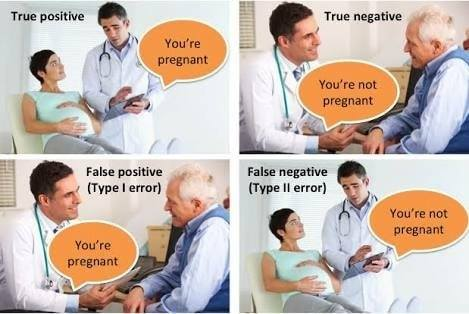

### 1. **Matriz de Confusión**

La **matriz de confusión** es una tabla que muestra el desempeño del modelo de clasificación. Cada fila de la matriz representa las instancias de la clase predicha, mientras que cada columna representa las instancias de la clase real (o verdadera).

La matriz tiene la siguiente estructura:

|                | **Predicción Positiva (1)** | **Predicción Negativa (0)** |
|----------------|-----------------------------|-----------------------------|
| **Real Positiva (1)** | TP (Verdaderos Positivos)     | FN (Falsos Negativos) |
| **Real Negativa (0)** | FP (Falsos Positivos)        | TN (Verdaderos Negativos) |

Para obtener las métricas desde la matriz de confusión, utilizamos los valores de **TP**, **TN**, **FP** y **FN**.

### 1. **Accuracy**

La **precisión** mide qué porcentaje de las predicciones del modelo son correctas. Se calcula de la siguiente manera:

$$
\text{Precisión} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}
$$


En términos de la **matriz de confusión**, la precisión puede calcularse como:

$$
\text{Precisión} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Donde:

- **TP** (True Positives): Verdaderos positivos (instancias correctamente clasificadas como positivas).
- **TN** (True Negatives): Verdaderos negativos (instancias correctamente clasificadas como negativas).
- **FP** (False Positives): Falsos positivos (instancias incorrectamente clasificadas como positivas).
- **FN** (False Negatives): Falsos negativos (instancias incorrectamente clasificadas como negativas).


### 2. **Recall (Sensibilidad)**

El **recall** mide la capacidad del modelo para identificar correctamente las instancias positivas (las que deberían ser clasificadas como "1" o "sobrevivió" en el dataset Titanic).

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

El **recall** responde a la pregunta: ¿De todas las instancias que son realmente positivas, cuántas el modelo identificó correctamente?

### 3. **F1-Score**

El **F1-score** es la media armónica entre la precisión y el recall. Es una métrica útil cuando se busca un balance entre ambos. Su fórmula es:

$$
\text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
$$

El **F1-score** es útil cuando tenemos un desbalance en las clases (por ejemplo, si hay muchas más instancias negativas que positivas en el dataset).


## Overfitting y Underfitting
El overfitting y el underfitting son dos problemas comunes en los modelos de Machine Learning:

* **Overfitting:** Ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento y captura el ruido o detalles irrelevantes, lo que resulta en un pobre rendimiento en datos no vistos (generalización baja). En árboles de decisión, esto sucede cuando el árbol es demasiado profundo.

* **Underfitting:** Ocurre cuando el modelo no logra capturar patrones importantes en los datos debido a ser demasiado simple. En árboles de decisión, esto ocurre cuando el árbol tiene muy poca profundidad.

#🚧 Bloque 4 : Introducción a Árboles de Decisión con Scikit-learn

##3.1 Introducción a la lógica de árboles de decisión (30 min)

### ¿Qué es un árbol de decisión?

Un árbol de decisión es un modelo de predicción que divide los datos mediante preguntas lógicas secuenciales.

Estructura:

* Nodo → condición (ej.: ¿Sex == ‘female’?)
* Rama → respuesta (Sí / No)
* Hoja → resultado final (ej.: Survived = 1)

El árbol automáticamente busca los puntos de corte óptimos para dividir los datos y mejorar la predicción del target.

```
                ¿Sex = female?
                 /          \
               Sí            No
         ¿Pclass = 3?     ¿Age < 10?
           /    \           /    \
        No     Sí        Sí      No
      Surv   No Surv   Surv    No Surv

```
##Limitaciones:##
* Sobreajuste si el árbol es muy profundo (overfitting).
* Sensibilidad a pequeños cambios en los datos.

##3.2 Preparación del dataset


In [ ]:
df = sns.load_dataset('titanic')
df = df[['survived', 'sex', 'pclass', 'age', 'fare']]

# Imputar la edad con la media
df['age'] = df['age'].fillna(df['age'].mean())

# Eliminar solo filas con NA en las otras columnas (fare o sex)
df = df.dropna()

# Codificar 'sex'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Definir X e y
X = df[['sex', 'pclass', 'age', 'fare']]
Y = df['survived']

### Dividir entre train y test


In [ ]:
# Dividimos el dataset: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (623, 4)
X_test shape : (268, 4)
y_train shape: (623,)
y_test shape : (268,)


##3.3 Entrenamiento del modelo (30 min)


In [ ]:
# 7. Crear y entrenar el árbol de decisión
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

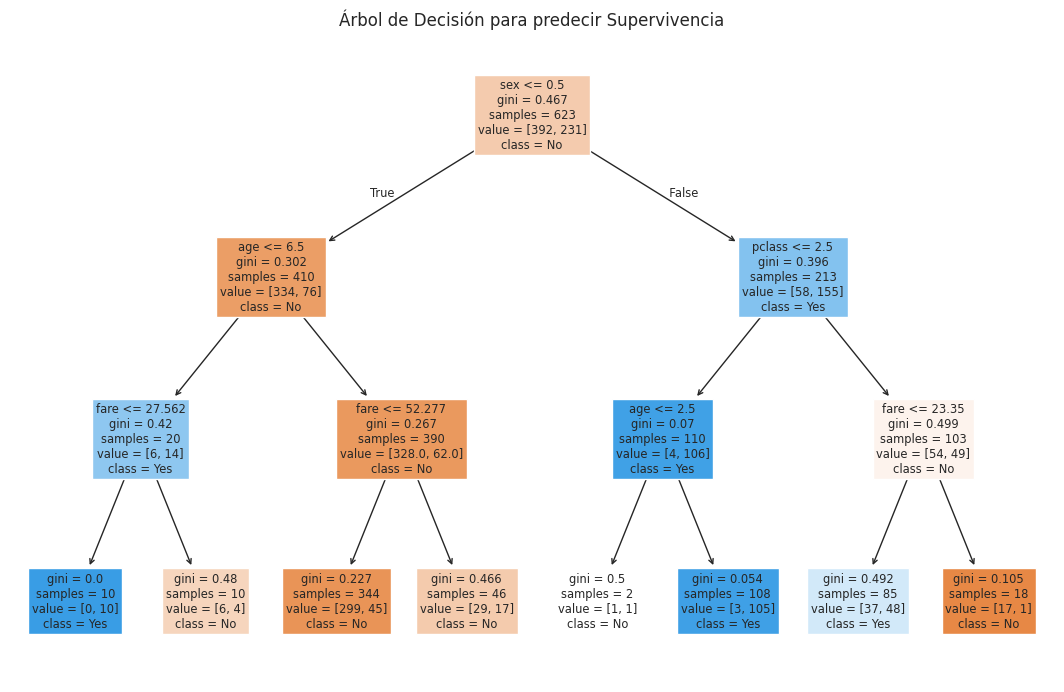

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Árbol de Decisión para predecir Supervivencia")
plt.show()

##3.4 Interpretación del árbol y discusión (20 min)

Visualización del árbol (plot_tree)

¿Qué variables son más importantes?